# Apply Artificial Neural Network Algorithm for an Image Classification Task

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:

y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

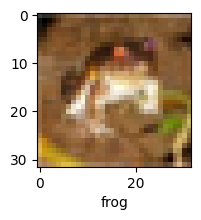

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.8125 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.6247 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5413 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4833 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4338 - accuracy: 0.4930


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.44      0.50      1000
           1       0.60      0.63      0.61      1000
           2       0.45      0.15      0.22      1000
           3       0.31      0.47      0.37      1000
           4       0.53      0.26      0.35      1000
           5       0.51      0.21      0.29      1000
           6       0.39      0.72      0.50      1000
           7       0.64      0.45      0.53      1000
           8       0.44      0.78      0.56      1000
           9       0.52      0.56      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000

